Visualizing the predictions made on test of DAVIS (part of the training_validation process)

Mean Squared Error (MSE): 0.263
Mean Absolute Error (MAE): 0.287
R² Score: 0.672
Spearman Correlation: 0.681
Pearson Correlation: 0.820


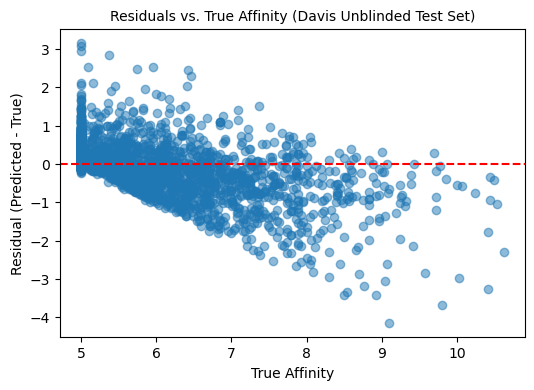

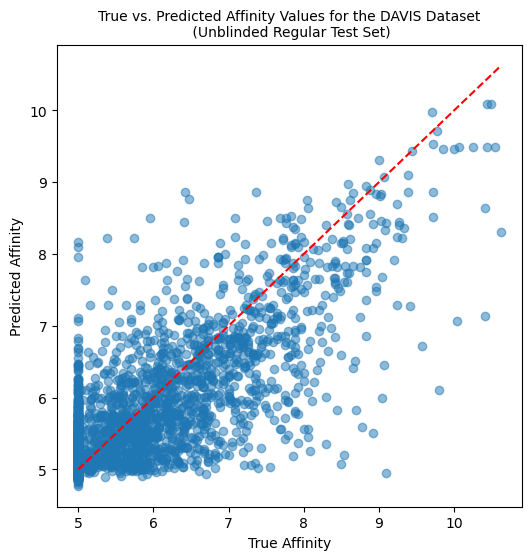

In [6]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats
import matplotlib.pyplot as plt

def plot(predictionFile:str, title1:str, title2:str):
    df = pd.read_csv(predictionFile)  # Replace with your actual filename
    # Extract True Labels and Predicted Scores
    y_true = df["True_Label"].values
    y_pred = df["Predicted_Value"].values
    
    # Compute regression metrics
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    pearson_corr, _ = stats.pearsonr(y_true.flatten(), y_pred.flatten())  # Extract first value
    spearman_corr, _ = stats.spearmanr(y_true.flatten(), y_pred.flatten())  # Extract first value


    # Print metrics
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"R² Score: {r2:.3f}")
    print(f"Spearman Correlation: {spearman_corr:.3f}")
    print(f"Pearson Correlation: {pearson_corr:.3f}")
    
    residuals = y_pred - y_true
    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("True Affinity")
    plt.ylabel("Residual (Predicted - True)")
    plt.title(title2, fontsize = 10)
    plt.show()

    # Scatter plot of true vs. predicted values
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle="--")  # Identity line
    plt.xlabel("True Affinity")
    plt.ylabel("Predicted Affinity")
    plt.title(title1, fontsize = 10)
    plt.show()



plot("../results/1_21/predictions_GINConvNet_davis.csv", "True vs. Predicted Affinity Values for the DAVIS Dataset\n (Unblinded Regular Test Set)", "Residuals vs. True Affinity (Davis Unblinded Test Set)")


training_validtation on DAVIS here will pass in pharos to outputed model

In [9]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
# Add the project directory to the Python path
sys.path.append('/Users/adele/Documents/GitHub/GraphDTA')

In [3]:
import torch
import numpy as np
from torch_geometric.data import DataLoader
from models.ginconv import GINConvNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the validation dataset
validation_data = torch.load('data/processed/pharos.pt')

# Create a DataLoader for the validation dataset
validation_loader = DataLoader(validation_data, batch_size=32, shuffle=False)

for batch in validation_loader:
    print(batch)  # This will print the batch structure, useful for debugging
    break  # Print only the first batch to inspect structure

for batch in validation_loader:
    affinities = batch.y  # Extract the affinity values
    print(affinities)  # Print affinities for this batch


/opt/anaconda3/envs/geometric/lib/python3.11/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: dlopen(/opt/anaconda3/envs/geometric/lib/python3.11/site-packages/torch_scatter/_version_cpu.so, 0x0006): Symbol not found: __ZN5torch3jit17parseSchemaOrNameERKNSt3__112basic_stringIcNS1_11char_traitsIcEENS1_9allocatorIcEEEEb
  Referenced from: <2711955E-91F2-3C44-B702-16E8D8D60085> /opt/anaconda3/envs/geometric/lib/python3.11/site-packages/torch_scatter/_version_cpu.so
  Expected in:     <66FB8649-BB87-3CD6-A177-462038DCAE02> /opt/anaconda3/envs/geometric/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/opt/anaconda3/envs/geometric/lib/python3.11/site-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: dlopen(/opt/anaconda3/envs/geometric/l

DataBatch(x=[914, 78], edge_index=[2, 1984], y=[32], target=[32, 1000], c_size=[32], batch=[914], ptr=[33])
tensor([7.6200, 8.3100, 8.3100, 8.3100, 8.3100, 6.3700, 6.7100, 7.1100, 7.1000,
        6.5300, 7.0600, 7.9600, 6.5600, 6.0900, 7.2800, 6.2800, 6.1700, 6.3000,
        6.8400, 6.3800, 6.6000, 4.5200, 8.0000, 8.0000, 7.9000, 8.7000, 7.7500,
        7.1800, 6.5000, 6.2300, 6.0900, 8.7000])
tensor([ 7.5800,  8.6700, 10.4100,  9.5900,  6.8000,  7.6400,  7.6200,  9.1500,
         8.7000,  8.5200,  8.1500,  8.1500,  8.0000,  7.9600,  7.8900,  7.6800,
         7.6600,  7.6200,  7.2800,  7.1100,  7.1100,  7.1000,  7.0600,  6.9800,
         6.9700,  6.9200,  6.8100,  6.7100,  6.6900,  6.5600,  6.5400,  6.5300])
tensor([6.3700, 6.3300, 6.3000, 6.0900, 6.0800, 6.0600, 6.0300, 6.0200, 6.0000,
        6.2800, 8.3100, 8.3100, 7.1000, 6.6500, 6.6400, 6.1000, 8.3100, 8.3100,
        8.3100, 8.3100, 7.7400, 6.7700, 6.8800, 6.7700, 8.3100, 8.3100, 8.5200,
        8.5200, 8.3000, 8.3000, 8.3000, 8.

/opt/anaconda3/envs/geometric/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [12]:
import torch
import numpy as np

model = GINConvNet().to(device) 

model_file_name = '../results/1_21/model_GINConvNet_davis.model'
model.load_state_dict(torch.load(model_file_name, map_location=device))

# Define a function to make predictions
def predict_affinities(model, dataloader):
    model.eval()  
    all_preds = []
    all_true = []

    with torch.no_grad():  # Disable gradient calculation for inference
        for batch_data in dataloader:
            batch_data = batch_data.to(device)  # Move data to the appropriate device
            output = model(batch_data)  # Forward pass to get predictions

            # Store predicted and true values
            all_preds.append(output.cpu().numpy())  
            all_true.append(batch_data.y.cpu().numpy())  

    # Convert lists to numpy arrays
    predictions = np.concatenate(all_preds)
    true_values = np.concatenate(all_true)

    return true_values, predictions

# Run predictions on the validation data
y_true, y_pred = predict_affinities(model, validation_loader)

# Print results (formatted for readability)
print("True Values vs. Predicted Affinities:")
for true_val, pred_val in zip(y_true.flatten(), y_pred.flatten()):  # Ensure values are scalars
    print(f"True: {true_val:.3f}, Predicted: {pred_val:.3f}")
    
# Save to file
pd.DataFrame({
    "True_Label": y_true.flatten(),
    "Predicted_Value": y_pred.flatten()
}).to_csv("pharos_reclass_predictions_output.csv", index=False)

print("Saved to 'pharos_reclass_predictions_output.csv'.")


True Values vs. Predicted Affinities:
True: 7.620, Predicted: 5.983
True: 8.310, Predicted: 5.138
True: 8.310, Predicted: 5.136
True: 8.310, Predicted: 5.089
True: 8.310, Predicted: 5.116
True: 6.370, Predicted: 5.806
True: 6.710, Predicted: 5.015
True: 7.110, Predicted: 5.086
True: 7.100, Predicted: 5.259
True: 6.530, Predicted: 5.673
True: 7.060, Predicted: 5.291
True: 7.960, Predicted: 5.258
True: 6.560, Predicted: 5.407
True: 6.090, Predicted: 4.813
True: 7.280, Predicted: 4.795
True: 6.280, Predicted: 5.030
True: 6.170, Predicted: 5.420
True: 6.300, Predicted: 5.281
True: 6.840, Predicted: 5.008
True: 6.380, Predicted: 5.181
True: 6.600, Predicted: 5.241
True: 4.520, Predicted: 5.019
True: 8.000, Predicted: 5.080
True: 8.000, Predicted: 5.080
True: 7.900, Predicted: 4.955
True: 8.700, Predicted: 5.005
True: 7.750, Predicted: 5.047
True: 7.180, Predicted: 4.354
True: 6.500, Predicted: 4.565
True: 6.230, Predicted: 4.590
True: 6.090, Predicted: 4.621
True: 8.700, Predicted: 4.952
Tr

Mean Squared Error (MSE): 5.888
Mean Absolute Error (MAE): 2.290
R² Score: -14.293
Spearman Correlation: 0.049
Pearson Correlation: 0.091


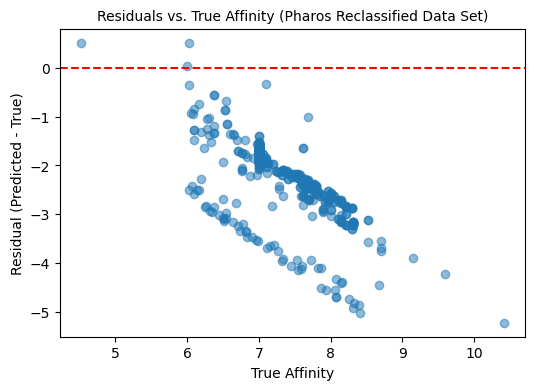

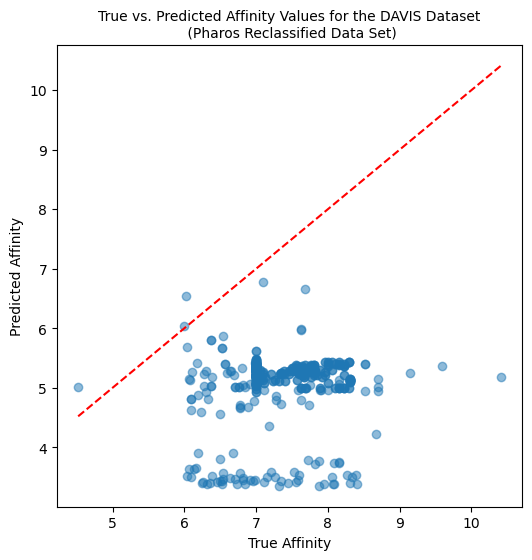

In [13]:
plot("pharos_reclass_predictions_output.csv", "True vs. Predicted Affinity Values for the DAVIS Dataset\n (Pharos Reclassified Data Set)", "Residuals vs. True Affinity (Pharos Reclassified Data Set)")

Mean Squared Error (MSE): 0.540
Mean Absolute Error (MAE): 0.449
R² Score: 0.277
Spearman Correlation: 0.659
Pearson Correlation: 0.706


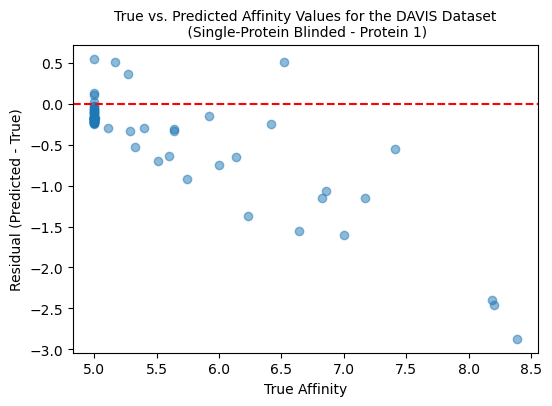

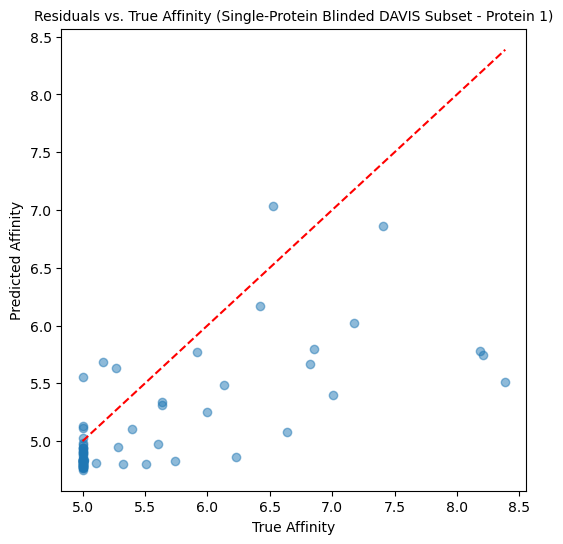

In [15]:
plot("../davis_blinding/predictions_GINConvNet_davis_b.csv", "Residuals vs. True Affinity (Single-Protein Blinded DAVIS Subset - Protein 1)","True vs. Predicted Affinity Values for the DAVIS Dataset\n (Single-Protein Blinded - Protein 1)")

Mean Squared Error (MSE): 0.628
Mean Absolute Error (MAE): 0.430
R² Score: 0.287
Spearman Correlation: 0.557
Pearson Correlation: 0.664


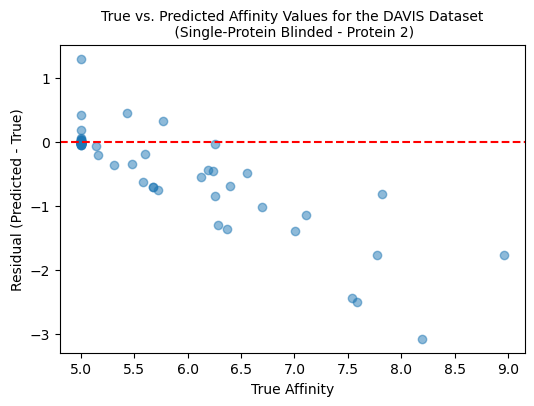

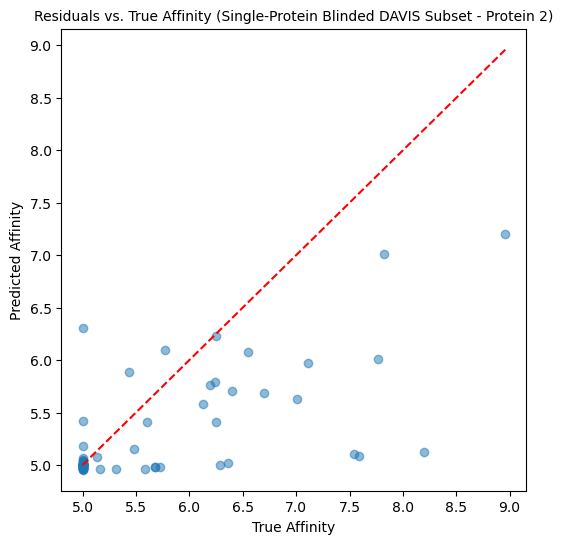

In [16]:
plot("../davis_blinding/predictions_GINConvNet_davis_b2.csv", "Residuals vs. True Affinity (Single-Protein Blinded DAVIS Subset - Protein 2)","True vs. Predicted Affinity Values for the DAVIS Dataset\n (Single-Protein Blinded - Protein 2)")

Mean Squared Error (MSE): 0.614
Mean Absolute Error (MAE): 0.413
R² Score: 0.114
Spearman Correlation: 0.391
Pearson Correlation: 0.419


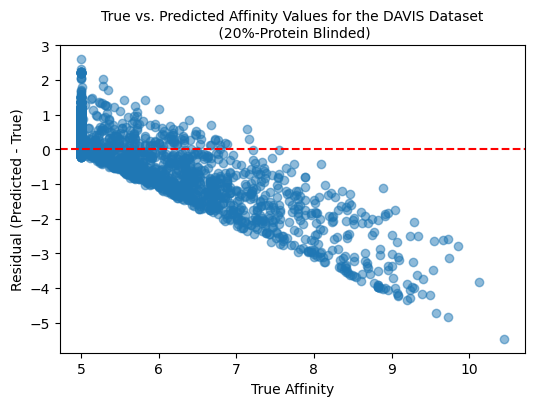

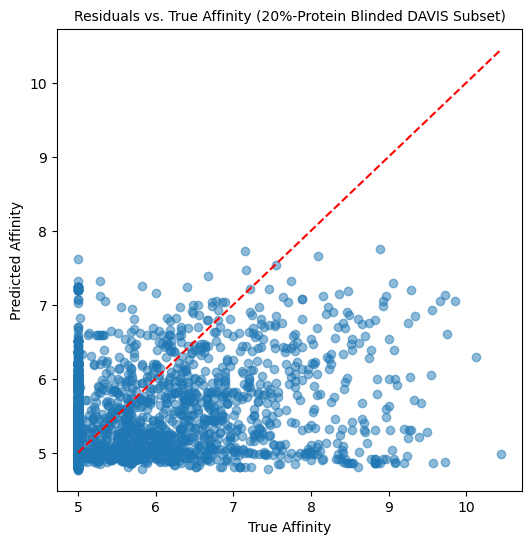

In [17]:
plot("../davis_blinding/predictions_GINConvNet_davis_b3.csv", "Residuals vs. True Affinity (20%-Protein Blinded DAVIS Subset)","True vs. Predicted Affinity Values for the DAVIS Dataset\n (20%-Protein Blinded)")

### Stats about the train test split of DAVIS used in GraphDTA

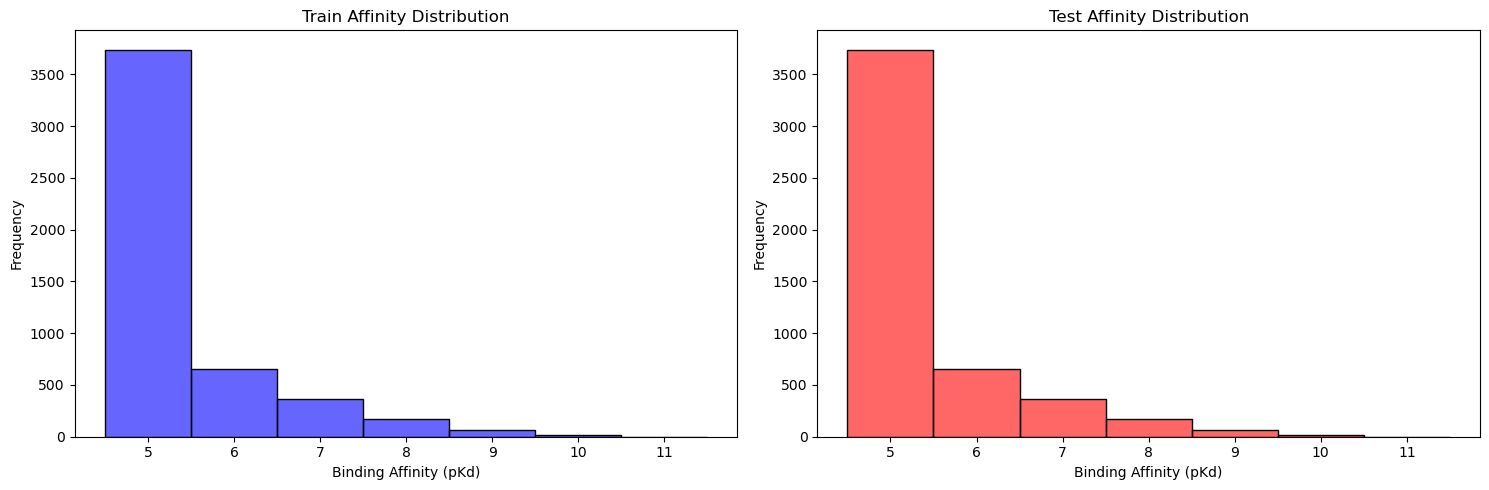

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
test_df = pd.read_csv('/Users/adele/Documents/GitHub/GraphDTA/data/davis_test.csv')
train_df = pd.read_csv('/Users/adele/Documents/GitHub/GraphDTA/data/davis_test.csv')

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Train Affinity Histogram
sns.histplot(train_df["affinity"], kde=False, color="blue", bins=20, alpha=0.6, discrete=True, ax=axes[0])
axes[0].set_title("Train Affinity Distribution")
axes[0].set_xlabel("Binding Affinity (pKd)")
axes[0].set_ylabel("Frequency")

# Test Affinity Histogram
sns.histplot(test_df["affinity"], kde=False, color="red", bins=20, alpha=0.6, discrete=True, ax=axes[1])
axes[1].set_title("Test Affinity Distribution")
axes[1].set_xlabel("Binding Affinity (pKd)")
axes[1].set_ylabel("Frequency")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# Ensure no overlap in proteins
# assert len(set(train_df["target_sequence"]) & set(test_df["target_sequence"])) == 0, "Leakage detected!"
# print("No protein overlap between training and test sets!")
